### Carregando dados:

In [1]:
import pickle

with open('features_tratadas/critic_temp.pkl', 'rb') as f:
    crit_temp_array = pickle.load(f)
with open('features_tratadas/atomic_mass.pkl', 'rb') as f:
    atomic_mass_array = pickle.load(f)
with open('features_tratadas/fie.pkl', 'rb') as f:
    fie_array = pickle.load(f)
with open('features_tratadas/atom_radius.pkl', 'rb') as f:
    atom_radius_array = pickle.load(f)
with open('features_tratadas/density.pkl', 'rb') as f:
    density_array = pickle.load(f)
with open('features_tratadas/elec_aff.pkl', 'rb') as f:
    elec_aff_array = pickle.load(f)
with open('features_tratadas/fusion_heat.pkl', 'rb') as f:
    fusion_heat_array = pickle.load(f)
with open('features_tratadas/thermal_cond.pkl', 'rb') as f:
    thermal_cond_array = pickle.load(f)
with open('features_tratadas/valence.pkl', 'rb') as f:
    valence_array = pickle.load(f)

### Separando em train - test:

In [2]:
from sklearn.model_selection import train_test_split

crit_temp_array_train, crit_temp_array_test = train_test_split(crit_temp_array, test_size=0.2, random_state=42)
atomic_mass_array_train, atomic_mass_array_test = train_test_split(atomic_mass_array, test_size=0.2, random_state=42)
fie_array_train, fie_array_test = train_test_split(fie_array, test_size=0.2, random_state=42)
atom_radius_array_train, atom_radius_array_test = train_test_split(atom_radius_array, test_size=0.2, random_state=42)
density_array_train, density_array_test = train_test_split(density_array, test_size=0.2, random_state=42)
elec_aff_array_train, elec_aff_array_test = train_test_split(elec_aff_array, test_size=0.2, random_state=42)
fusion_heat_array_train, fusion_heat_array_test = train_test_split(fusion_heat_array, test_size=0.2, random_state=42)
thermal_cond_array_train, thermal_cond_array_test = train_test_split(thermal_cond_array, test_size=0.2, random_state=42)
valence_array_train, valence_array_test = train_test_split(valence_array, test_size=0.2, random_state=42)

### Criando modelo com sklearn:

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Cria o modelo:
modelo = MLPRegressor(hidden_layer_sizes=(32, 16), activation='relu', solver='adam', max_iter=1000, early_stopping=True, random_state=42)

X_train = np.column_stack(
    [atomic_mass_array_train, fie_array_train, atom_radius_array_train, density_array_train, 
    elec_aff_array_train, fusion_heat_array_train, thermal_cond_array_train, valence_array_train]
)

# Normalização
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

# Faz o fit:
pred_neural_01 = modelo.fit(X_train, crit_temp_array_train)

# Analisando métricas de correlação:
y_pred_train = modelo.predict(X_train)
y_pred_train = np.where(y_pred_train < 0, 0, y_pred_train) # Zera valores negativos previstos

# Reverte a transformação (raiz quadrada) → escala real (Kelvin):
y_real_train = crit_temp_array_train ** 2
y_pred_train = y_pred_train ** 2

# Calcula as métricas na escala original:
mae = mean_absolute_error(y_real_train, y_pred_train)
rmse = np.sqrt(mean_squared_error(y_real_train, y_pred_train))
r2 = r2_score(y_real_train, y_pred_train)

print(f"MAE (treino): {mae:.2f} K")
print(f"RMSE (treino): {rmse:.2f} K")
print(f"R² (treino): {r2:.4f}")

MAE (treino): 10.45 K
RMSE (treino): 16.03 K
R² (treino): 0.7820


### Analisando Acurácia do modelo:

MAE (real): 10.29 K
RMSE (real): 15.87 K
R² (real): 0.7811


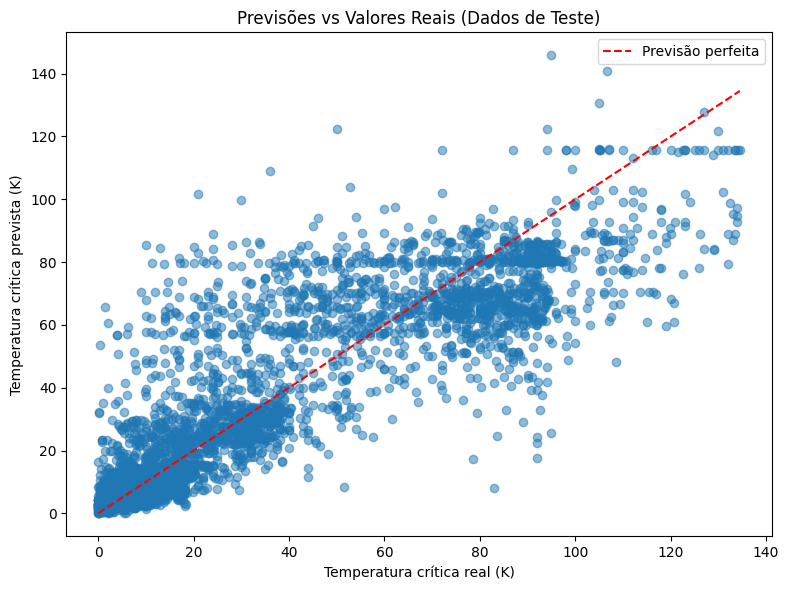

In [4]:
import matplotlib.pyplot as plt

X_test = np.column_stack(
    [atomic_mass_array_test, fie_array_test, atom_radius_array_test, density_array_test,
     elec_aff_array_test, fusion_heat_array_test, thermal_cond_array_test, valence_array_test]
)

# Normalização
scaler = StandardScaler()
X_test = scaler.fit_transform(X_test)

# Analisando métricas de correlação::
y_pred_test = modelo.predict(X_test)
y_pred_test = np.where(y_pred_test < 0, 0, y_pred_test) # Zera valores negativos previstos

# Reverte a transformação (raiz quadrada) → escala real (Kelvin):
y_real_test = crit_temp_array_test ** 2
y_pred_test = y_pred_test ** 2

# Calcula as métricas na escala Kelvin:
mae_test = mean_absolute_error(y_real_test, y_pred_test)
rmse_test = np.sqrt(mean_squared_error(y_real_test, y_pred_test))
r2_test = r2_score(y_real_test, y_pred_test)

print(f"MAE (real): {mae_test:.2f} K")
print(f"RMSE (real): {rmse_test:.2f} K")
print(f"R² (real): {r2_test:.4f}")

# Plotando gráfico de comparação:
plt.figure(figsize=(8, 6))
plt.scatter(y_real_test, y_pred_test, alpha=0.5)
plt.plot([y_real_test.min(), y_real_test.max()],
         [y_real_test.min(), y_real_test.max()],
         color='red', linestyle='--', label='Previsão perfeita')

plt.xlabel("Temperatura crítica real (K)")
plt.ylabel("Temperatura crítica prevista (K)")
plt.title("Previsões vs Valores Reais (Dados de Teste)")
plt.legend()
plt.tight_layout()
plt.show()